# 💊 **Prediction and Recommendation of Personalized Treatments**

## 🎯 **Business Objective (BO3)**
- **Objective**: Predict and recommend personalized treatments for patients based on their characteristics (medical history, allergies, contraindications, etc.) and medication data (`liste_amm.xls`).
- **Target**: Patients, doctors, and pharmacists.
- **Value**: Improve treatment effectiveness and reduce the risk of side effects.

---
🗺️ Roadmap to Achieve BO3
1️⃣ - Data Understanding
Required Data
Medication Data (liste_amm.xls):

INN (Active Ingredient): Active ingredient of the medication.

Dosage: Dosage of the medication.

Form: Galenic form (tablet, capsule, etc.).

Therapeutic Class: Class and subclass of the medication.

Indications: Medical conditions treated.

Contraindications: Conditions where the medication should not be used.

Side Effects: Possible adverse effects.

G/P/B: Type of medication (Generic, Princeps, Biosimilar).

VEIC: Classification (Vital, Essential, Non-Essential).

Patient Data:

Medical History: Previous diagnoses, treatments followed.

Allergies: Known allergies to medications or ingredients.

Contraindications: Specific patient conditions (pregnancy, renal insufficiency, etc.).

Demographics: Age, sex, weight, height.

Preferences: Patient preferences (e.g., galenic form, laboratory).

2️⃣ - Data Preparation
Steps
Data Cleaning:

Remove Duplicates: Ensure no duplicate records exist in the dataset.

Handle Missing Values: Impute or remove missing values based on the context.

Standardize Formats: Normalize text (e.g., uppercase, accents) and numerical data (e.g., dosage units).

Feature Engineering:

Medications:

Combine INN, Dosage, Form, and Therapeutic Class to create a Characteristics column.

Extract numerical dosage and normalize it.

Encode categorical variables (Form, Class, G/P/B, VEIC) using One-Hot Encoding or Label Encoding.

Patients:

Create features based on medical history, allergies, and contraindications.

Encode allergies and contraindications using TF-IDF or Word Embeddings.

Calculate derived features like BMI (Body Mass Index) from weight and height.

In [123]:
#Importing necessary Libraries
import numpy as np 
import pandas as pd 
from math import * 
import matplotlib.pyplot as plt 
from PIL import Image
import seaborn as sns 
import itertools
import io
import plotly.offline as py 
py.init_notebook_mode(connected=True) 
import plotly.graph_objs as go 
from plotly.subplots import make_subplots
import plotly.figure_factory as ff 
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import pickle 
import scipy.sparse as sp
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from scipy.sparse import hstack
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer

# Exploratory Data Analysis(EDA)

In [72]:
medical_data= pd.read_excel('liste_amm2.xlsx')
medical_data.head()

,Nom,Dosage,Forme,Présentation,DCI,Classe,Sous Classe,Laboratoire,AMM,Date AMM,Conditionnement primaire,Spécifocation Conditionnement primaire,tableau,Durée de conservation,Indications,G/P/B,VEIC,contre_indication,side_effect
0,5-FLUOROURACIL,250 MG,Solution injectable,B/5/5ML,FLUOROURACILE,ANTINEOPLASIQUES ET IMMUNOMODULATEURS,ANTINEOPLASIQUES,EBEWE Pharma,6943091H,2001-01-20,Ampoule,en verre,A,24,- Adénocarcinomes digestifs évolués;- Cancers ...,Générique,Vital,Hypertension artérielle sévère,Réactions cutanées
1,5-FLUOROURACILE EBEWE,1000 mg/20 ml,Solution injectable pour perfusion,B/1/20 ml,FLUOROURACILE,ANTINEOPLASIQUES ET IMMUNOMODULATEURS,ANTINEOPLASIQUES,EBEWE Pharma,6943093H,2012-04-30,Flacon,en verre incolore de type I + bouchon bromobut...,A,24,- Adénocarcinomes digestifs évolués;- Cancers ...,Générique,Vital,Maladies rénales chroniques,Fièvre
2,5-FLUOROURACILE EBEWE,500 mg/10 ml,Solution injectable pour perfusion,B/5/10 ml,FLUOROURACILE,ANTINEOPLASIQUES ET IMMUNOMODULATEURS,ANTINEOPLASIQUES,EBEWE Pharma,6943092H,2012-04-30,Flacon,en verre incolore de type I + bouchon bromobut...,A,24,- Adénocarcinomes digestifs évolués;- Cancers ...,Générique,Vital,Maladies rénales chroniques,Acouphènes
3,ABBOTICINE,200 MG,Poudre pour suspension orale,FL/60ML,ERYTHROMYCINE,ANTIINFECTIEUX GENERAUX A USAGE SYSTEMIQUE,ANTIBACTERIENS (USAGE SYSTEMIQUE),ADWYA,9043061,1990-12-19,Flacon,en verre ambre,A,48,INFECTIONS DUES AUX GERMES SENSIBLES NOTAMMENT...,Princeps,Essentiel,Maladies osseuses,Hypotension
4,ABEVMY,400 mg(25mg/ml),Solution à diluer pour perfusion,B/1FL/16ml,BEVACIZUMAB,ANTINEOPLASIQUES ET IMMUNOMODULATEURS,ANTINEOPLASIQUES,MYLAN PHARMACEUTICALS PRIVATE LIMITED,20343022H,2021-09-06,Flacon,en verrede type I,A,24,Cancer métastatique du colon ou du rectum- Abv...,Biosimilaire,Vital,Troubles psychiatriques,Sueurs nocturnes


In [73]:
import pandas as pd
import numpy as np
from faker import Faker

# Initialiser Faker pour générer des données réalistes
fake = Faker()

# Nombre de lignes souhaité
n_rows = 6059

# Listes des allergies et contre-indications (100 valeurs chacune)
allergies = [
    "Pollen", "Acariens", "Poils de chat", "Poils de chien", "Arachides", "Lait", "Œufs", 
    "Fruits de mer", "Poisson", "Soja", "Blé", "Noix", "Gluten", "Moisissures", "Latex", 
    "Piqûres d'abeilles", "Piqûres de guêpes", "Poussière", "Parfums", "Nickel", "Or", 
    "Argent", "Caféine", "Chocolat", "Fraises", "Tomates", "Kiwi", "Ananas", "Banane", 
    "Avocat", "Mangue", "Céleri", "Carottes", "Pommes de terre", "Oignons", "Ail", 
    "Épices", "Moutarde", "Sésame", "Sulfites", "Aspirine", "Ibuprofène", "Pénicilline", 
    "Amoxicilline", "Céphalosporines", "Tétracycline", "Sulfamides", "Anticonvulsivants", 
    "Insuline", "Contrastes iodés", "Métaux lourds", "Formaldéhyde", "Teintures capillaires", 
    "Cosmétiques", "Crèmes solaires", "Détergents", "Produits chimiques", "Plantes", 
    "Herbe à puce", "Chêne", "Sumac", "Ambrosia", "Graminées", "Bouleau", "Cèdre", 
    "Cyprès", "Olivier", "Peuplier", "Saule", "Pin", "Eucalyptus", "Lavande", "Menthe", 
    "Romarin", "Thym", "Basilic", "Coriandre", "Persil", "Aneth", "Cumin", "Curcuma", 
    "Gingembre", "Cannelle", "Noix de muscade", "Clou de girofle", "Vanille", "Réglisse", 
    "Miel", "Propolis", "Gelée royale", "Pollen d'abeille", "Aloès", "Camomille", 
    "Calendula", "Arnica", "Echinacea", "Ginseng", "Valériane", "Passiflore", "Mélisse", 
    "Aubépine", "Ginkgo biloba", "Thé vert", "Café", "Vin", "Bière", "Champagne"
]

contre_indications = [
    "Grossesse", "Allaitement", "Insuffisance rénale", "Insuffisance hépatique", 
    "Diabète", "Hypertension", "Hypotension", "Maladies cardiaques", "Asthme", 
    "Épilepsie", "Maladie de Parkinson", "Alzheimer", "Sclérose en plaques", 
    "Lupus", "Polyarthrite rhumatoïde", "Ostéoporose", "Cancer", "VIH/SIDA", 
    "Tuberculose", "Hépatite B", "Hépatite C", "Maladie de Crohn", "Colite ulcéreuse", 
    "Diverticulite", "Ulcère gastrique", "Reflux gastro-œsophagien", "Allergie à la pénicilline", 
    "Allergie aux sulfamides", "Allergie à l'aspirine", "Allergie aux AINS", 
    "Allergie aux produits de contraste", "Allergie au latex", "Allergie aux œufs", 
    "Allergie aux arachides", "Allergie au gluten", "Intolérance au lactose", 
    "Maladie cœliaque", "Thyroïdite", "Hyperthyroïdie", "Hypothyroïdie", 
    "Maladie d'Addison", "Maladie de Cushing", "Acromégalie", "Déficit en G6PD", 
    "Anémie falciforme", "Thalassémie", "Hémochromatose", "Maladie de Wilson", 
    "Porphyrie", "Fibrose kystique", "Bronchopneumopathie chronique obstructive", 
    "Emphysème", "Sarcoïdose", "Pneumonie", "Grippe", "Rhume", "Sinusite", 
    "Otite", "Pharyngite", "Laryngite", "Bronchite", "Pneumopathie", "Tuberculose", 
    "Asbestose", "Silicose", "Maladie de Lyme", "Paludisme", "Dengue", "Zika", 
    "Chikungunya", "Fièvre jaune", "Rage", "Tétanos", "Diphtérie", "Coqueluche", 
    "Rougeole", "Rubéole", "Oreillons", "Varicelle", "Zona", "Herpès", "Cytomégalovirus", 
    "Mononucléose", "Syphilis", "Gonorrhée", "Chlamydia", "Trichomonase", 
    "Candidose", "Aspergillose", "Cryptococcose", "Histoplasmose", "Blastomycose", 
    "Coccidioïdomycose", "Leishmaniose", "Trypanosomiase", "Schistosomiase", 
    "Filariose", "Onchocercose", "Lèpre", "Trachome", "Lymphogranulome vénérien", 
    "Granulome inguinal"
]

# Générer les données
data = {
    'ID Patient': [f'PAT{str(i).zfill(4)}' for i in range(1, n_rows + 1)],  # ID unique
    'Historique Médical': [fake.text(max_nb_chars=200) for _ in range(n_rows)],  # Historique médical aléatoire
    'Allergies': [np.random.choice(allergies) if np.random.rand() > 0.2 else np.nan for _ in range(n_rows)],  # Allergies avec 20% de valeurs manquantes
    'Contre-Indications': [np.random.choice(contre_indications) if np.random.rand() > 0.2 else np.nan for _ in range(n_rows)],  # Contre-indications avec 20% de valeurs manquantes
    'Âge': [np.random.randint(18, 90) for _ in range(n_rows)],  # Âge entre 18 et 90 ans
    'Sexe': [np.random.choice(['Homme', 'Femme']) for _ in range(n_rows)],  # Sexe uniquement Homme ou Femme
    'Poids (kg)': [np.random.randint(40, 150) for _ in range(n_rows)],  # Poids entre 40 et 150 kg
    'Taille (cm)': [np.random.randint(140, 200) for _ in range(n_rows)]  # Taille entre 140 et 200 cm
}

# Créer le DataFrame
patient_data = pd.DataFrame(data)

# Afficher les premières lignes pour vérification
print("Données générées :")
print(patient_data.head())

# Vérifier la forme du DataFrame
print("\nForme du DataFrame :", patient_data.shape)

# Vérifier les modalités uniques pour Allergies et Contre-Indications
print("\nModalités uniques pour Allergies :", patient_data['Allergies'].nunique())
print("Modalités uniques pour Contre-Indications :", patient_data['Contre-Indications'].nunique())

# Sauvegarder le DataFrame dans un fichier Excel
patient_data.to_excel('patient_data_clean.xlsx', index=False)
print("\nDonnées sauvegardées dans 'patient_data_clean.xlsx'.")

Données générées :
  ID Patient                                 Historique Médical Allergies  \
0    PAT0001  Occur parent defense hope market those majorit...   Curcuma   
1    PAT0002  Weight human shoulder week attention. Conferen...       NaN   
2    PAT0003  Responsibility of from. Finish soldier effort ...       NaN   
3    PAT0004  Commercial activity entire stage Mr. Friend wi...        Or   
4    PAT0005  Director kind group door guy cover three minut...   Vanille   

  Contre-Indications  Âge   Sexe  Poids (kg)  Taille (cm)  
0                NaN   66  Homme         123          164  
1          Oreillons   42  Homme          56          154  
2             Dengue   43  Femme          82          154  
3                NaN   38  Femme          82          149  
4           Trachome   42  Homme          60          167  

Forme du DataFrame : (6059, 8)

Modalités uniques pour Allergies : 107
Modalités uniques pour Contre-Indications : 101

Données sauvegardées dans 'patient_da

In [74]:
print("Nouvelle forme du DataFrame :", patient_data.shape)

Nouvelle forme du DataFrame : (6059, 8)


In [75]:
patient_data.head()

,ID Patient,Historique Médical,Allergies,Contre-Indications,Âge,Sexe,Poids (kg),Taille (cm)
0,PAT0001,Occur parent defense hope market those majorit...,Curcuma,NaN,66,Homme,123,164
1,PAT0002,Weight human shoulder week attention. Conferen...,NaN,Oreillons,42,Homme,56,154
2,PAT0003,Responsibility of from. Finish soldier effort ...,NaN,Dengue,43,Femme,82,154
3,PAT0004,Commercial activity entire stage Mr. Friend wi...,Or,NaN,38,Femme,82,149
4,PAT0005,Director kind group door guy cover three minut...,Vanille,Trachome,42,Homme,60,167


# Data Understanding 

In [77]:
patient_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6059 entries, 0 to 6058
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID Patient          6059 non-null   object
 1   Historique Médical  6059 non-null   object
 2   Allergies           4856 non-null   object
 3   Contre-Indications  4853 non-null   object
 4   Âge                 6059 non-null   int64 
 5   Sexe                6059 non-null   object
 6   Poids (kg)          6059 non-null   int64 
 7   Taille (cm)         6059 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 378.8+ KB


In [78]:
patient_data.describe()

,Âge,Poids (kg),Taille (cm)
count,6059.000000,6059.000000,6059.000000
mean,53.658194,94.258954,169.464103
std,20.722359,31.858284,17.170003
min,18.000000,40.000000,140.000000
25%,36.000000,66.000000,155.000000
50%,54.000000,94.000000,170.000000
75%,72.000000,122.000000,184.000000
max,89.000000,149.000000,199.000000


In [79]:
# Vérification des valeurs manquantes
print("\nValeurs manquantes par colonne :")
print(patient_data.isnull().sum())


Valeurs manquantes par colonne :
ID Patient               0
Historique Médical       0
Allergies             1203
Contre-Indications    1206
Âge                      0
Sexe                     0
Poids (kg)               0
Taille (cm)              0
dtype: int64


In [80]:
# Vérification des doublons
print("\nNombre de doublons :", patient_data.duplicated().sum())


Nombre de doublons : 0


In [81]:
# Analyse des variables catégorielles
print("\nDistribution des catégories pour 'Sexe' :")
print(patient_data['Sexe'].value_counts())


Distribution des catégories pour 'Sexe' :
Sexe
Homme    3030
Femme    3029
Name: count, dtype: int64


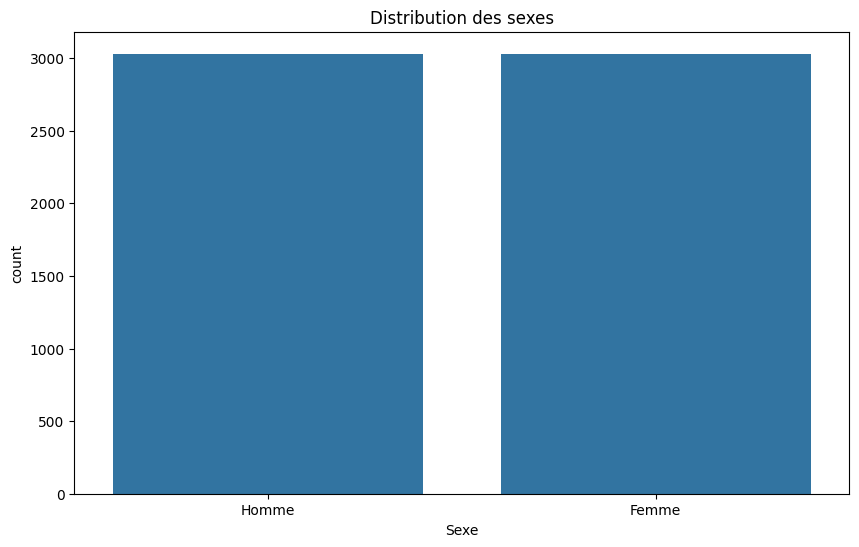

In [82]:
# Visualisation des distributions
plt.figure(figsize=(10, 6))
sns.countplot(data=patient_data, x='Sexe')
plt.title("Distribution des sexes")
plt.show()

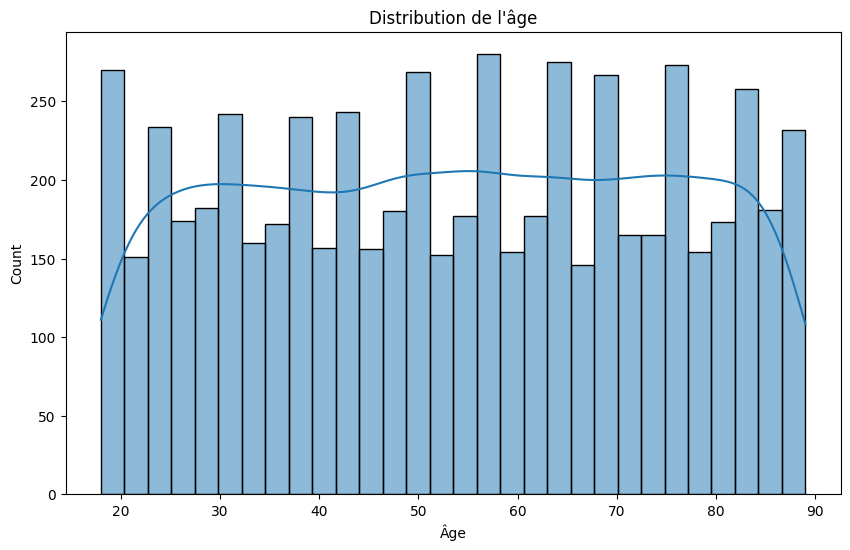

In [83]:
# Analyse des variables numériques
plt.figure(figsize=(10, 6))
sns.histplot(patient_data['Âge'], bins=30, kde=True)
plt.title("Distribution de l'âge")
plt.show()


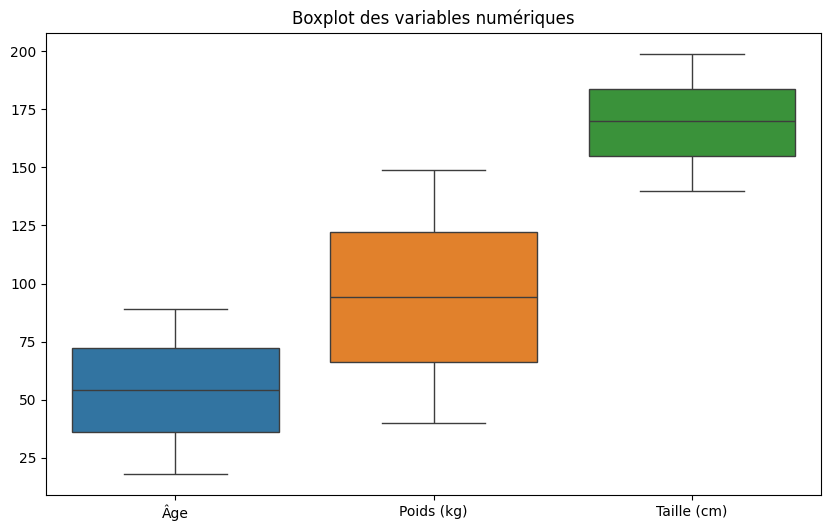

In [84]:
# Boxplot pour détecter les outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=patient_data[['Âge', 'Poids (kg)', 'Taille (cm)']])
plt.title("Boxplot des variables numériques")
plt.show()

## Data preparation

In [97]:
# Supprimer la colonne 'patient_id'
patient_data.drop('ID Patient', axis=1, inplace=True)

In [99]:
# Remplacer les valeurs manquantes dans 'Allergies' et 'Contre-Indications' par 'Aucune'
patient_data['Allergies'].fillna('Aucune', inplace=True)
patient_data['Contre-Indications'].fillna('Aucune', inplace=True)


In [101]:
patient_data.isnull().sum()

Historique Médical    0
Allergies             0
Contre-Indications    0
Âge                   0
Sexe                  0
Poids (kg)            0
Taille (cm)           0
dtype: int64

In [103]:
# Vérifier à nouveau les valeurs manquantes
print("\nValeurs manquantes après traitement :")
print(patient_data.isnull().sum())


Valeurs manquantes après traitement :
Historique Médical    0
Allergies             0
Contre-Indications    0
Âge                   0
Sexe                  0
Poids (kg)            0
Taille (cm)           0
dtype: int64


In [105]:
# Identifier les outliers pour 'Âge', 'Poids (kg)', et 'Taille (cm)'
Q1 = patient_data[['Âge', 'Poids (kg)', 'Taille (cm)']].quantile(0.25)
Q3 = patient_data[['Âge', 'Poids (kg)', 'Taille (cm)']].quantile(0.75)
IQR = Q3 - Q1

# Définir les limites pour les outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrer les outliers
outliers = ((patient_data[['Âge', 'Poids (kg)', 'Taille (cm)']] < lower_bound) | 
            (patient_data[['Âge', 'Poids (kg)', 'Taille (cm)']] > upper_bound)).any(axis=1)

# Supprimer les outliers
patient_data = patient_data[~outliers]

# Vérifier la nouvelle forme des données
print("\nForme des données après suppression des outliers :", patient_data.shape)


Forme des données après suppression des outliers : (6059, 7)


In [107]:
# Remplacer 'Sexe' par 0 pour 'Femme' et 1 pour 'Homme'
patient_data['Sexe'] = patient_data['Sexe'].map({'Femme': 0, 'Homme': 1})

# Afficher les premières lignes après encodage
print("\nDonnées après encodage de 'Sexe' :")
print(patient_data.head())


Données après encodage de 'Sexe' :
                                  Historique Médical Allergies  \
0  Occur parent defense hope market those majorit...   Curcuma   
1  Weight human shoulder week attention. Conferen...    Aucune   
2  Responsibility of from. Finish soldier effort ...    Aucune   
3  Commercial activity entire stage Mr. Friend wi...        Or   
4  Director kind group door guy cover three minut...   Vanille   

  Contre-Indications  Âge  Sexe  Poids (kg)  Taille (cm)  
0             Aucune   66     1         123          164  
1          Oreillons   42     1          56          154  
2             Dengue   43     0          82          154  
3             Aucune   38     0          82          149  
4           Trachome   42     1          60          167  


**Utility of CountVectorizer:**

1. **Text to Numerical Representation**: Converts text data into a matrix of token counts, making it suitable for machine learning models.
2. **Bag of Words Model**: Creates a vocabulary of unique words and counts their occurrences in each document.
3. **Feature Extraction**: Enables the use of text data as features in models by transforming words into numerical vectors.

In [125]:
# Définir les colonnes catégorielles, textuelles et numériques
categorical_cols = ['Allergies', 'Contre-Indications', 'Sexe']
text_cols = ['Historique Médical']
numeric_cols = ['Âge', 'Poids (kg)', 'Taille (cm)']

# Créer un ColumnTransformer pour appliquer différents prétraitements
preprocessor = ColumnTransformer(
    transformers=[
        ('text', CountVectorizer(), text_cols[0]),  # Traiter le texte avec CountVectorizer
        ('cat', OneHotEncoder(), categorical_cols),  # Encoder les variables catégorielles
        ('num', StandardScaler(), numeric_cols)      # Normaliser les variables numériques
    ]
)

# Créer un pipeline avec le prétraitement
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Appliquer le pipeline aux données
patient_data_processed = pipeline.fit_transform(patient_data)

# Convertir le résultat en DataFrame pour visualisation
# (Si le résultat est une matrice sparse, utilisez .toarray())
patient_data_processed = pd.DataFrame(patient_data_processed.toarray())

# Afficher les premières lignes du DataFrame transformé
print("Données transformées :")
print(patient_data_processed.head())

Données transformées :
   0     1     2     3     4     5     6     7     8     9     ...  1174  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0  ...   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

   1175  1176  1177  1178  1179  1180      1181      1182      1183  
0   0.0   0.0   0.0   0.0   0.0   1.0  0.595628  0.902227 -0.318262  
1   0.0   0.0   0.0   0.0   0.0   1.0 -0.562637 -1.201010 -0.900721  
2   0.0   0.0   0.0   0.0   1.0   0.0 -0.514376 -0.384828 -0.900721  
3   0.0   0.0   0.0   0.0   1.0   0.0 -0.755681 -0.384828 -1.191950  
4   0.0   0.0   0.0   0.0   0.0   1.0 -0.562637 -1.075443 -0.143524  

[5 rows x 1184 columns]


In [133]:
patient_data_processed

,0,1,2,3,4,5,6,7,8,9,...,1174,1175,1176,1177,1178,1179,1180,1181,1182,1183
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.595628,0.902227,-0.318262
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.562637,-1.201010,-0.900721
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.514376,-0.384828,-0.900721
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.755681,-0.384828,-1.191950
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.562637,-1.075443,-0.143524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6054,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.595628,-0.196479,1.429116
6055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.286552,0.274395,1.487362
6056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.029978,0.368570,-0.842475
6057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.466114,-0.761527,-1.250196
